In [2]:
import pandas as pd

# File paths
total_rainfall_path = r"C:\Users\HP\Downloads\PRAICP-1004-RainfallTS\Data\rainfall-monthly-total.csv"
rainy_days_path = r"C:\Users\HP\Downloads\PRAICP-1004-RainfallTS\Data\rainfall-monthly-number-of-rain-days.csv"
highest_daily_rainfall_path = r"C:\Users\HP\Downloads\PRAICP-1004-RainfallTS\Data\rainfall-monthly-highest-daily-total.csv"

# Load datasets
df_total_rainfall = pd.read_csv(total_rainfall_path)
df_rainy_days = pd.read_csv(rainy_days_path)
df_highest_daily = pd.read_csv(highest_daily_rainfall_path)

# Convert 'month' column to datetime format
for df in [df_total_rainfall, df_rainy_days, df_highest_daily]:
    df["month"] = pd.to_datetime(df["month"], format="%Y-%m")

# Merge datasets
df_merged = df_total_rainfall.merge(df_rainy_days, on="month").merge(df_highest_daily, on="month")

# Set index to month
df_merged.set_index("month", inplace=True)

# Display first few rows
df_merged.head()

,total_rainfall,no_of_rainy_days,maximum_rainfall_in_a_day
month,,,
1982-01-01,107.1,10,36.5
1982-02-01,27.8,5,9.4
1982-03-01,160.8,11,61.7
1982-04-01,157.0,14,45.1
1982-05-01,102.2,10,33.0


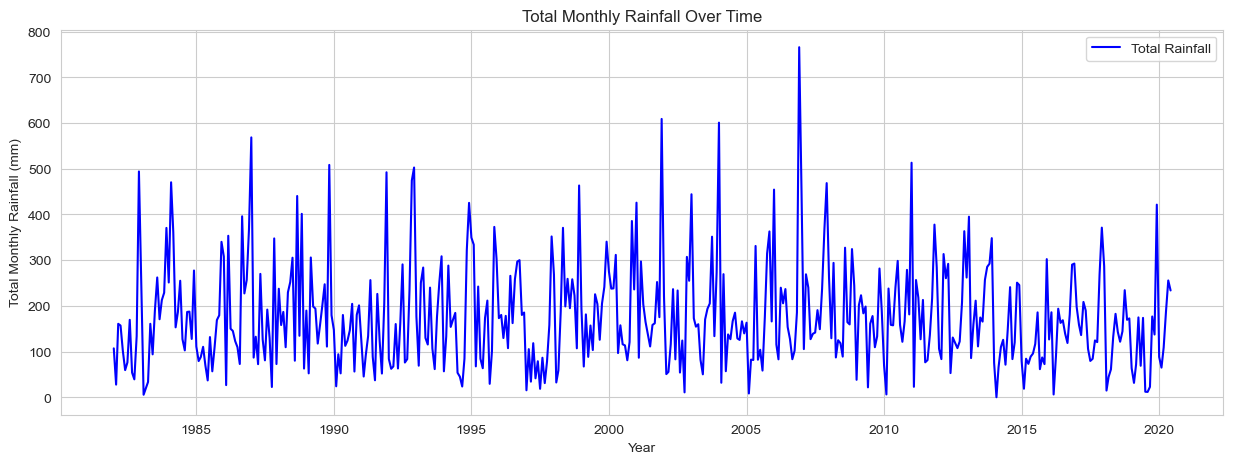

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


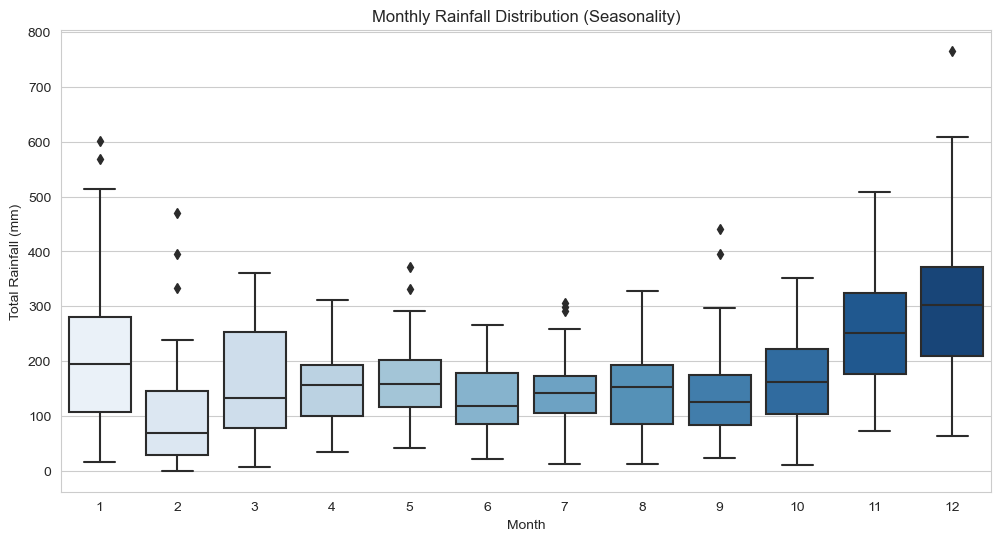

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Plot total rainfall over time
plt.figure(figsize=(15, 5))
plt.plot(df_merged.index, df_merged["total_rainfall"], label="Total Rainfall", color="blue")
plt.xlabel("Year")
plt.ylabel("Total Monthly Rainfall (mm)")
plt.title("Total Monthly Rainfall Over Time")
plt.legend()
plt.show()

# Monthly Seasonality Boxplot
df_merged["month_num"] = df_merged.index.month
plt.figure(figsize=(12, 6))
sns.boxplot(x="month_num", y="total_rainfall", data=df_merged, palette="Blues")
plt.xlabel("Month")
plt.ylabel("Total Rainfall (mm)")
plt.title("Monthly Rainfall Distribution (Seasonality)")
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(df_merged["total_rainfall"].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] <= 0.05:
    print("The data is stationary (reject null hypothesis).")
else:
    print("The data is non-stationary (apply differencing).")

ADF Statistic: -5.316803062036401
p-value: 5.053456689491713e-06
The data is stationary (reject null hypothesis).


In [5]:
from pmdarima import auto_arima

# Find best ARIMA parameters
auto_model = auto_arima(df_merged["total_rainfall"], 
                        seasonal=True, 
                        m=12, 
                        trace=True, 
                        suppress_warnings=True)

# Print summary of best model
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.91 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=5684.628, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=5641.390, Time=0.94 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=5648.960, Time=0.72 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=6251.387, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=5668.373, Time=0.13 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=5634.483, Time=2.49 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=5642.198, Time=3.38 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=5646.491, Time=2.18 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=5635.665, Time=3.45 sec
 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=5635.883, Time=3.58 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=5636.000, Time=2.56 sec
 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=5636.741, Time=3.72 sec
 ARIMA(1,0,0)(2,0,0)[12]     

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     total_rainfall   No. Observations:                  462
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -2702.166
Date:                            Fri, 07 Mar 2025   AIC                           5412.331
Time:                                    17:28:58   BIC                           5428.651
Sample:                                01-01-1982   HQIC                          5418.771
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2024      0.047      4.304      0.000       0.110       0.295
ar.S.L12       0.4441      0.044   

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


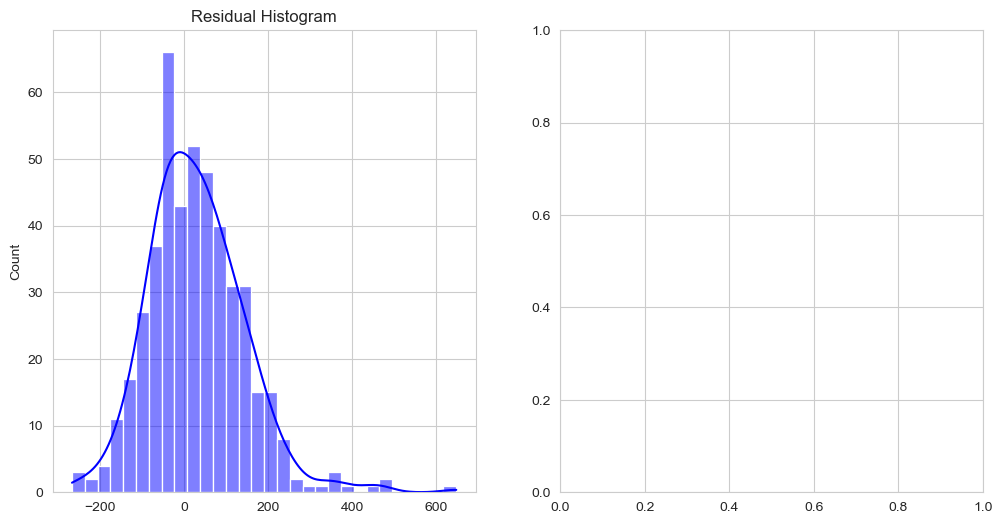

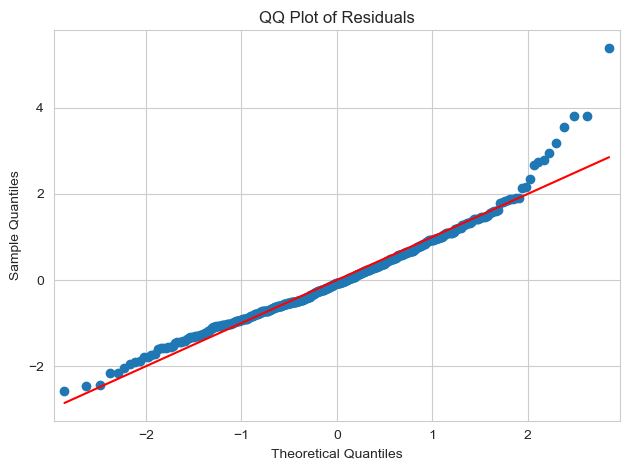

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model using the best parameters from Auto ARIMA
sarima_model = SARIMAX(df_merged["total_rainfall"],
                       order=(1, 0, 0),  # Best ARIMA order
                       seasonal_order=(2, 0, 0, 12),  # Best Seasonal order
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

# Plot residuals to check assumptions
import matplotlib.pyplot as plt
import seaborn as sns

residuals = sarima_result.resid

plt.figure(figsize=(12, 6))

# Residual plot
plt.subplot(1, 2, 1)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.title("Residual Histogram")

# QQ Plot for normality check
import statsmodels.api as sm
plt.subplot(1, 2, 2)
sm.qqplot(residuals, line="s", fit=True)
plt.title("QQ Plot of Residuals")

plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


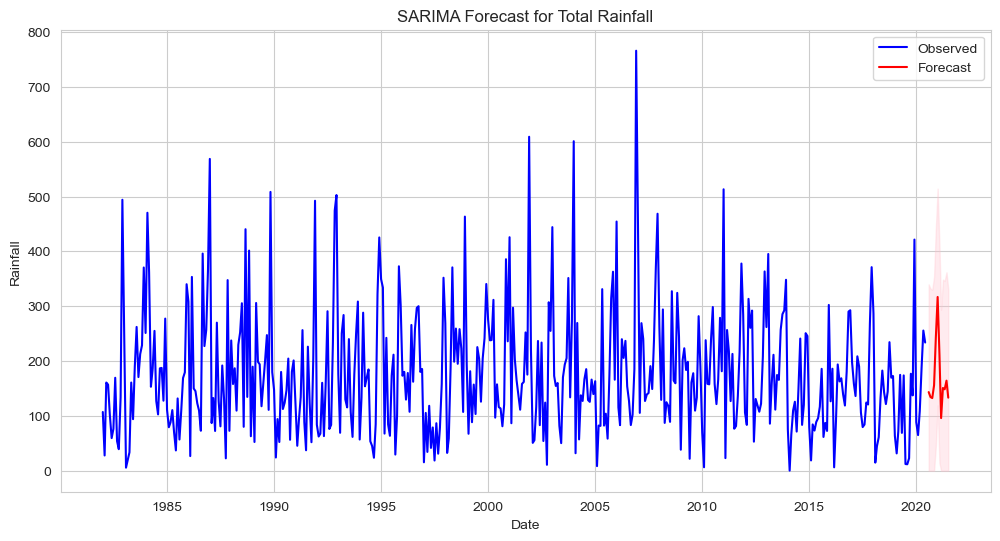

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming `df_merged` contains the 'total_rainfall' time series
df = df_merged.copy()

# Fit an improved SARIMA model with differencing
model = sm.tsa.SARIMAX(df["total_rainfall"], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecasting for the next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# Adjust forecast start date
forecast_index = pd.date_range(df.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq="M")

# Get confidence intervals and ensure non-negative values
forecast_ci = forecast.conf_int()
forecast.predicted_mean = np.maximum(forecast.predicted_mean, 0)
forecast_ci[forecast_ci < 0] = 0

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["total_rainfall"], label="Observed", color="blue")
plt.plot(forecast_index, forecast.predicted_mean, label="Forecast", color="red")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color="pink", alpha=0.3)

plt.legend()
plt.title("SARIMA Forecast for Total Rainfall")
plt.xlabel("Date")
plt.ylabel("Rainfall")
plt.show()

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the model using the best parameters
sarima_model = SARIMAX(df_merged["total_rainfall"],
                       order=(1, 0, 0),  # ARIMA order
                       seasonal_order=(2, 0, 0, 12),  # Seasonal order
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     total_rainfall   No. Observations:                  462
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood               -2702.166
Date:                            Fri, 07 Mar 2025   AIC                           5412.331
Time:                                    17:29:01   BIC                           5428.651
Sample:                                01-01-1982   HQIC                          5418.771
                                     - 06-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2024      0.047      4.304      0.000       0.110       0.295
ar.S.L12       0.4441      0.044   

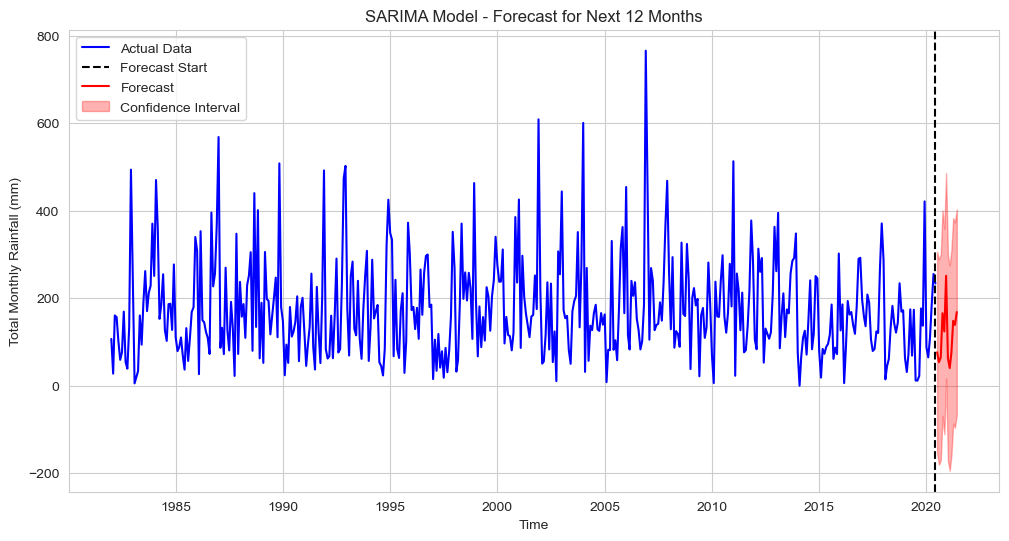

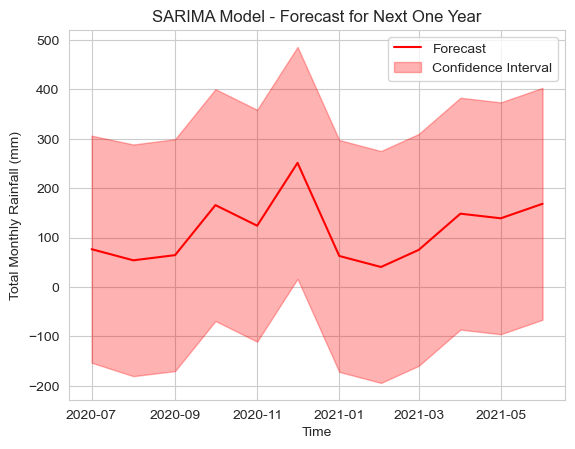

In [9]:
# Forecast for the next 12 months
forecast_steps = 12  # Adjust as needed
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Extract predicted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot Actual vs Forecasted Values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_merged["total_rainfall"], label="Actual Data", color="blue")
plt.axvline(df_merged.index[-1], color="black", linestyle="--", label="Forecast Start")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="red")
plt.fill_between(forecast_conf_int.index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color="red", alpha=0.3, label="Confidence Interval")
plt.xlabel("Time")
plt.ylabel("Total Monthly Rainfall (mm)")
plt.title("SARIMA Model - Forecast for Next 12 Months")
plt.legend()
plt.show()

plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="red")
plt.fill_between(forecast_conf_int.index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color="red", alpha=0.3, label="Confidence Interval")
plt.xlabel("Time")
plt.ylabel("Total Monthly Rainfall (mm)")
plt.title("SARIMA Model - Forecast for Next One Year")
plt.legend()
plt.show()

In [10]:
# Convert forecast results into a DataFrame for better readability
forecast_df = pd.DataFrame({
    "Forecasted Rainfall (mm)": forecast_mean,
    "Lower Bound (95% CI)": forecast_conf_int.iloc[:, 0],
    "Upper Bound (95% CI)": forecast_conf_int.iloc[:, 1]})

# Display forecasted values
print(" SARIMA Model - Forecast for Next 12 Months:\n")
print(forecast_df)

 SARIMA Model - Forecast for Next 12 Months:

            Forecasted Rainfall (mm)  Lower Bound (95% CI)  \
2020-07-01                 76.664433           -153.186174   
2020-08-01                 54.138487           -180.371692   
2020-09-01                 64.616149           -170.082893   
2020-10-01                165.929787            -68.776986   
2020-11-01                124.189675           -110.517415   
2020-12-01                251.458898             16.751795   
2021-01-01                 62.938253           -171.768851   
2021-02-01                 40.632143           -194.074960   
2021-03-01                 75.198758           -159.508346   
2021-04-01                148.568204            -86.138900   
2021-05-01                139.205265            -95.501839   
2021-06-01                168.536933            -66.170170   

            Upper Bound (95% CI)  
2020-07-01            306.515040  
2020-08-01            288.648666  
2020-09-01            299.315190  
2020-10

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Forecast for Maximum Rainfall in a Single Day (Next Month):
Forecasted Max Rainfall (mm)    29.424017
Lower Bound (95% CI)           -36.774061
Upper Bound (95% CI)            95.622096
Name: 2020-07-01 00:00:00, dtype: float64


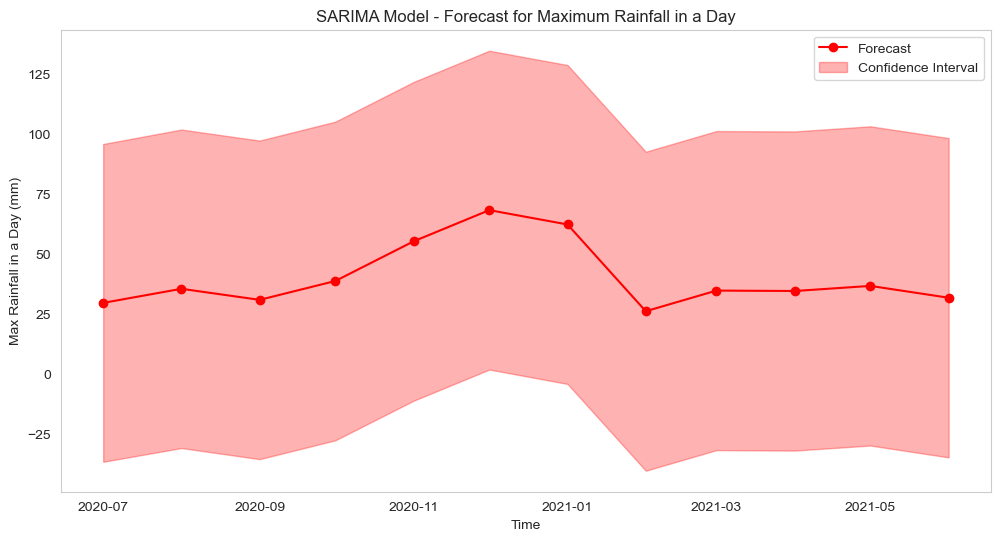

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset (Ensure 'maximum_rainfall_in_a_day' column exists)
df = df_merged.copy()

# Convert index to datetime format if not already
df.index = pd.to_datetime(df.index)

# Train SARIMA model
sarima_model = sm.tsa.statespace.SARIMAX(df['maximum_rainfall_in_a_day'],
                                         order=(1, 1, 1),  
                                         seasonal_order=(1, 1, 1, 12),  
                                         enforce_stationarity=False,  
                                         enforce_invertibility=False)

sarima_result = sarima_model.fit()

# Forecast for the next 12 months
forecast_steps = 12
forecast = sarima_result.get_forecast(steps=forecast_steps)

# Extract forecasted values and confidence intervals
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Convert forecast results into a DataFrame
forecast_df = pd.DataFrame({
    "Forecasted Max Rainfall (mm)": forecast_mean,
    "Lower Bound (95% CI)": forecast_conf_int.iloc[:, 0],
    "Upper Bound (95% CI)": forecast_conf_int.iloc[:, 1]
})

# Extract forecast for a **specific month** (e.g., next month's prediction)
single_month_forecast = forecast_df.iloc[0]  # First month prediction

# Display the forecast for a single month
print("\nForecast for Maximum Rainfall in a Single Day (Next Month):")
print(single_month_forecast)

# Plot the forecast for 12 months
plt.figure(figsize=(12, 6))
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="red", marker='o')
plt.fill_between(forecast_conf_int.index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color="red", alpha=0.3, label="Confidence Interval")
plt.xlabel("Time")
plt.ylabel("Max Rainfall in a Day (mm)")
plt.title("SARIMA Model - Forecast for Maximum Rainfall in a Day")
plt.legend()
plt.grid()
plt.show()
